In [ ]:
### Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


PART 1

In [ ]:
import pandas as pd
data = pd.read_csv('CO2_Emissions.csv')
data

FileNotFoundError: ignored

In [ ]:
data = pd.read_csv('CH4_Emissions.csv')
new_header = data.iloc[0] # grab the first row for the header
data = data[1:] # take the data less the header row
data.columns = new_header # set the header row as the df header

# Now we reset the index of the dataframe
data.reset_index(drop=True, inplace=True)

# Let's check the first few rows to ensure the changes are correct
data.head()

FileNotFoundError: ignored

In [ ]:
### Read in datasets
avg_temp = pd.read_csv('avg_temp.csv')

avg_temp = avg_temp[avg_temp['Year'] >= 1950]
avg_temp = avg_temp.rename(columns = {'Average_Fahrenheit_Temperature' : 'avg_temp'})
avg_temp

,Year,avg_temp
50,1950,51.6
51,1951,50.4
52,1952,51.1
53,1953,53.2
54,1954,52.8
...,...,...
119,2019,53.5
120,2020,53.1
121,2021,54.5
122,2022,54.0


<Axes: xlabel='Year'>

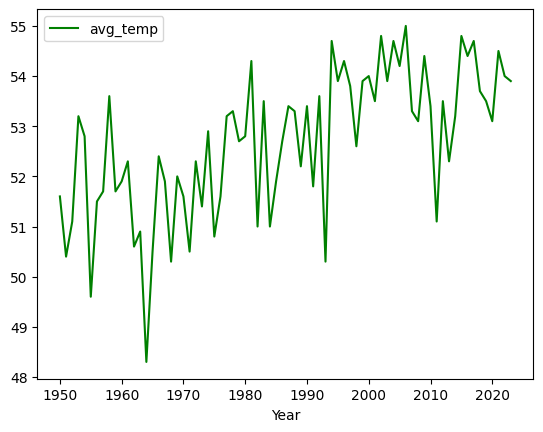

In [ ]:
avg_temp.plot(x='Year', y='avg_temp', color='green')

Slope (Coefficient): 0.043435764531654944
Intercept: -33.609470566456864


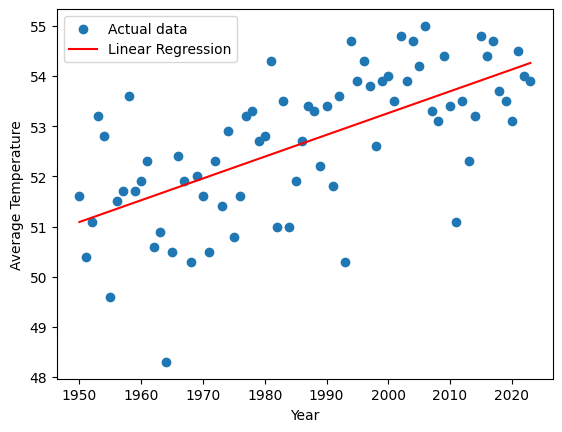

In [ ]:
x_values = avg_temp['Year'].values
y_values = avg_temp['avg_temp'].values

# Reshape the arrays to make them 2D, required by scikit-learn
x_values_reshaped = x_values.reshape(-1, 1)
y_values_reshaped = y_values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_values_reshaped, y_values_reshaped)

# Make predictions
predictions = model.predict(x_values_reshaped)

# Print the slope (coefficient) and intercept of the line
print("Slope (Coefficient):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# Plot the data and the regression line
plt.scatter(x_values, y_values, label='Actual data')
plt.plot(x_values, predictions, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

In [ ]:
emissions = pd.read_csv('emissions_by_country.csv')
emissions

,Entity,Code,Year,Annual CO2 emissions (zero filled)
0,Afghanistan,AFG,1750,0
1,Afghanistan,AFG,1751,0
2,Afghanistan,AFG,1752,0
3,Afghanistan,AFG,1753,0
4,Afghanistan,AFG,1754,0
...,...,...,...,...
66932,Zimbabwe,ZWE,2016,10737567
66933,Zimbabwe,ZWE,2017,9581633
66934,Zimbabwe,ZWE,2018,11854367
66935,Zimbabwe,ZWE,2019,10949084


In [ ]:
emissions
emissions_cleaned = emissions[emissions['Entity'] == 'United States']
emissions_cleaned = emissions_cleaned[emissions_cleaned['Year'] >= 1900]
emissions_cleaned = emissions_cleaned.drop('Code', axis=1)
emissions_cleaned = emissions_cleaned.rename(columns = {'Annual CO2 emissions (zero filled)': 'Emissions'})
emissions_cleaned

,Entity,Year,Emissions
63835,United States,1900,662738378
63836,United States,1901,721527528
63837,United States,1902,764495745
63838,United States,1903,894406917
63839,United States,1904,882057522
...,...,...,...
63951,United States,2016,5248023931
63952,United States,2017,5207751278
63953,United States,2018,5375490614
63954,United States,2019,5255816207


<Axes: xlabel='Year'>

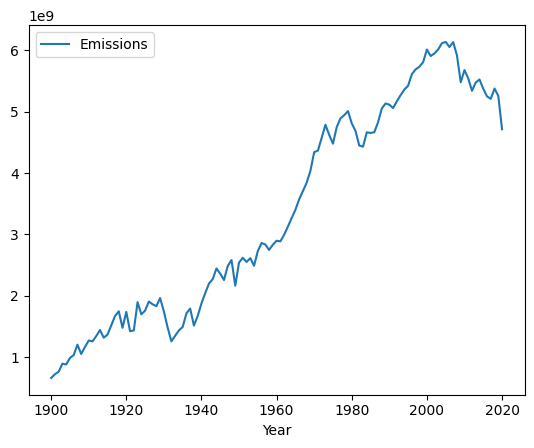

In [ ]:
emissions_cleaned.plot(x='Year', y='Emissions')

In [ ]:
joined = pd.merge(avg_temp, emissions_cleaned, on = 'Year', how = 'inner')
joined = joined[joined['Year'] >= 1960]
joined

,Year,avg_temp,Entity,Emissions
10,1960,51.9,United States,2897138041
11,1961,52.3,United States,2886696092
12,1962,50.6,United States,2993718164
13,1963,50.9,United States,3126294023
14,1964,48.3,United States,3264110570
...,...,...,...,...
66,2016,54.4,United States,5248023931
67,2017,54.7,United States,5207751278
68,2018,53.7,United States,5375490614
69,2019,53.5,United States,5255816207


Text(0, 0.5, 'Average Temperature')

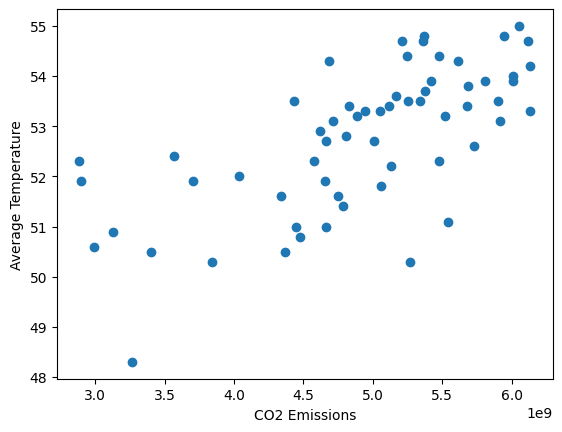

In [ ]:
plt.scatter(joined['Emissions'], joined['avg_temp'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Average Temperature')

Slope (Coefficient): 1.11705704171471e-09
Intercept: 47.258453629348516


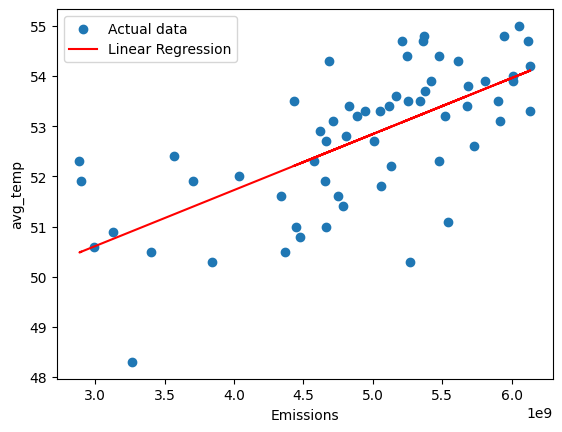

In [ ]:
x_values = joined['Emissions'].values
y_values = joined['avg_temp'].values

# Reshape the arrays to make them 2D, required by scikit-learn
x_values_reshaped = x_values.reshape(-1, 1)
y_values_reshaped = y_values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_values_reshaped, y_values_reshaped)

# Make predictions
predictions = model.predict(x_values_reshaped)

# Print the slope (coefficient) and intercept of the line
print("Slope (Coefficient):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# Plot the data and the regression line
plt.scatter(x_values, y_values, label='Actual data')
plt.plot(x_values, predictions, color='red', label='Linear Regression')
plt.xlabel('Emissions')
plt.ylabel('avg_temp')
plt.legend()
plt.show()

PART 2

In [ ]:
sea_level = pd.read_csv('sea level.csv')
sea_level

,Year,Adjusted sea level (inches)
0,1960,4.503937
1,1961,4.748031
2,1962,4.543307
3,1963,4.480315
4,1964,4.169291
5,1965,4.610236
6,1966,4.397638
7,1967,4.452756
8,1968,4.484252
9,1969,4.751968


<Axes: xlabel='Year'>

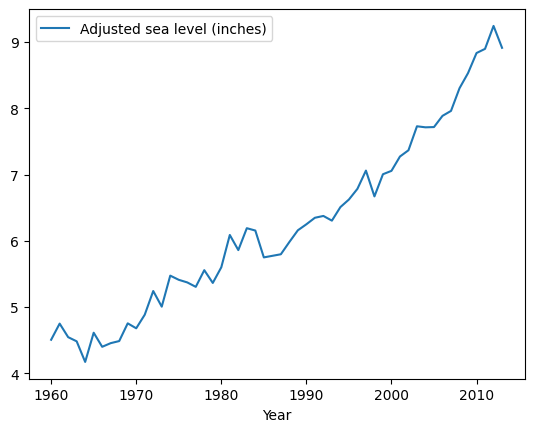

In [ ]:
sea_level.plot(x='Year', y='Adjusted sea level (inches)')

In [ ]:
sea_temp = pd.merge(avg_temp, sea_level, on = 'Year', how = 'inner')
sea_temp = sea_temp[sea_temp['Year'] >= 1960]
sea_temp

,Year,avg_temp,Adjusted sea level (inches)
0,1960,51.9,4.503937
1,1961,52.3,4.748031
2,1962,50.6,4.543307
3,1963,50.9,4.480315
4,1964,48.3,4.169291
5,1965,50.5,4.610236
6,1966,52.4,4.397638
7,1967,51.9,4.452756
8,1968,50.3,4.484252
9,1969,52.0,4.751968


Text(0, 0.5, 'Adjusted Sea level (inches)')

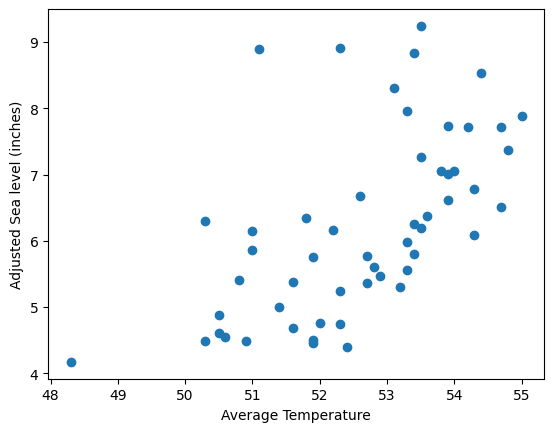

In [ ]:
plt.scatter(sea_temp['avg_temp'], sea_temp['Adjusted sea level (inches)'])
plt.xlabel('Average Temperature')
plt.ylabel('Adjusted Sea level (inches)')

Slope (Coefficient): 0.5546436522332844
Intercept: -22.95644681751409


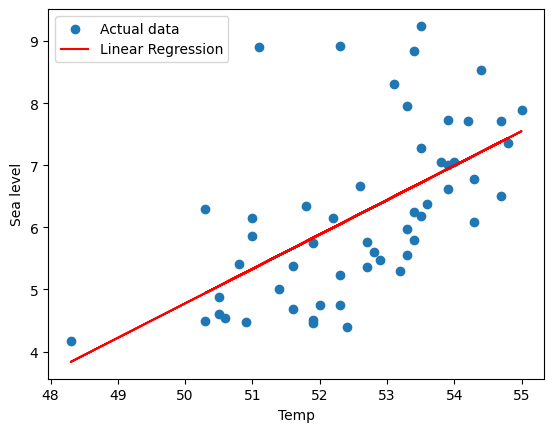

In [ ]:
x_values = sea_temp['avg_temp'].values
y_values = sea_temp['Adjusted sea level (inches)'].values

# Reshape the arrays to make them 2D, required by scikit-learn
x_values_reshaped = x_values.reshape(-1, 1)
y_values_reshaped = y_values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_values_reshaped, y_values_reshaped)

# Make predictions
predictions = model.predict(x_values_reshaped)

# Print the slope (coefficient) and intercept of the line
print("Slope (Coefficient):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# Plot the data and the regression line
plt.scatter(x_values, y_values, label='Actual data')
plt.plot(x_values, predictions, color='red', label='Linear Regression')
plt.xlabel('Temp')
plt.ylabel('Sea level')
plt.legend()
plt.show()

PART 3

In [ ]:
international_emissions = pd.read_csv('international_emissions.csv')
international_emissions = international_emissions.rename(columns = {'CO2 emissions \nper capita, \nlatest year' : 'co2_per_cap'})
international_emissions = international_emissions[['Country', 'co2_per_cap']]
international_emissions

,Country,co2_per_cap
0,NaN,kg
1,Afghanistan,0.31
2,Albania,2.00
3,Algeria,2.31
4,Angola,1.43
...,...,...
186,Venezuela (Bolivarian Republic of),4.81
187,Viet Nam,1.73
188,Yemen,0.95
189,Zambia,0.16


In [ ]:
forest_area = pd.read_csv('forest_area.csv')
forest_area = forest_area.rename(columns = {'Country and Area' : 'Country'})
forest_area = forest_area[['Country', 'forest_percent']]
forest_area

,Country,forest_percent
0,WORLD,31.13
1,Afghanistan,1.85
2,Albania,28.79
3,Algeria,0.82
4,American Samoa,85.65
...,...,...
232,Wallis and Futuna Islands,41.64
233,Western Sahara,2.50
234,Yemen,1.04
235,Zambia,60.28


In [ ]:
marine_protected_areas = pd.read_csv('marine_protected_areas.csv')
marine_protected_areas = marine_protected_areas[['Country', 'marine protected %']]
marine_protected_areas

,Country,marine protected %
0,World Total,11.4
1,Albania,2.7
2,Algeria,0.1
3,American Samoa,8.7
4,Angola,0.0
...,...,...
165,Uruguay,0.7
166,Vanuatu,0.0
167,Venezuela (Bolivarian Republic of),3.5
168,Viet Nam,0.6


In [ ]:
ter_mar_protected_areas = pd.read_csv('terrestrial_marine_protected_areas.csv')
ter_mar_protected_areas = ter_mar_protected_areas[['Country', 'terr_mar_protected_%']]
ter_mar_protected_areas

,Country,terr_mar_protected_%
0,World Total,14.5
1,Afghanistan,0.1
2,Albania,13.5
3,Algeria,7.1
4,American Samoa,8.7
...,...,...
206,Venezuela (Bolivarian Republic of),36.9
207,Viet Nam,2.9
208,Yemen,0.6
209,Zambia,37.9


In [ ]:
ter_protected_areas = pd.read_csv('terrestrial_protected_areas.csv')
ter_protected_areas = ter_protected_areas[['Country', 'terrestrial_protected']]
ter_protected_areas

,Country,terrestrial_protected
0,World Total,14.7
1,Afghanistan,0.1
2,Albania,17.7
3,Algeria,7.5
4,American Samoa,15.8
...,...,...
207,Venezuela (Bolivarian Republic of),54.1
208,Viet Nam,7.6
209,Yemen,0.8
210,Zambia,37.9


In [ ]:
co2_factors = pd.merge(international_emissions, forest_area, on='Country').merge(marine_protected_areas, on='Country').merge(ter_mar_protected_areas, on='Country').merge(ter_protected_areas, on='Country')
co2_factors
co2_factors.plot(x='co2_per_cap', y='terr_mar_protected_%')

,Country,co2_per_cap,forest_percent,marine protected %,terr_mar_protected_%,terrestrial_protected
0,Albania,2.00,28.79,2.7,13.5,17.7
1,Algeria,2.31,0.82,0.1,7.1,7.5
2,Angola,1.43,53.43,0.0,5.0,7.0
3,Antigua and Barbuda,4.89,18.45,0.2,0.3,18.6
4,Argentina,4.51,10.44,3.8,7.4,8.8
...,...,...,...,...,...,...
142,Uruguay,1.90,11.60,0.7,2.3,3.4
143,Vanuatu,0.38,36.28,0.0,0.1,4.2
144,Venezuela (Bolivarian Republic of),4.81,52.41,3.5,36.9,54.1
145,Viet Nam,1.73,47.23,0.6,2.9,7.6


<Axes: xlabel='co2_per_cap'>

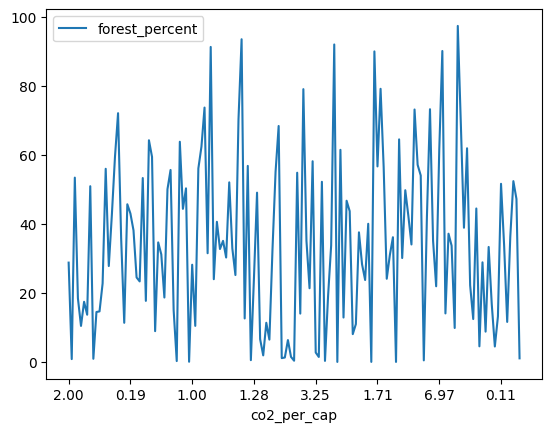

In [ ]:
co2_factors.plot(x='co2_per_cap', y='forest_percent')

Slope (Coefficient): -0.6981683225868487
Intercept: 37.88548436059094


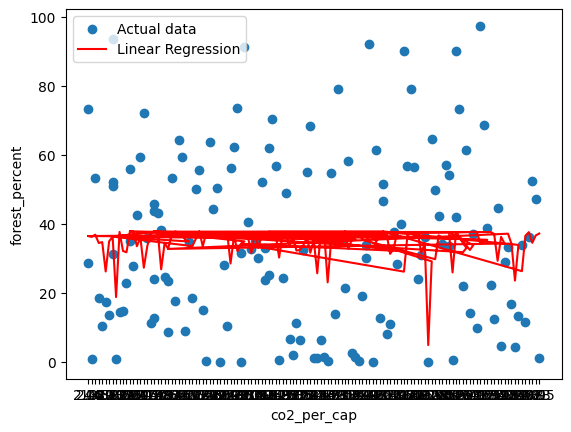

In [ ]:
co2_factors.plot(x='co2_per_cap', y='forest_percent')
x_values = co2_factors['co2_per_cap'].values
y_values = co2_factors['forest_percent'].values

# Reshape the arrays to make them 2D, required by scikit-learn
x_values_reshaped = x_values.reshape(-1, 1)
y_values_reshaped = y_values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_values_reshaped, y_values_reshaped)

# Make predictions
predictions = model.predict(x_values_reshaped)

# Print the slope (coefficient) and intercept of the line
print("Slope (Coefficient):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# Plot the data and the regression line
plt.scatter(x_values, y_values, label='Actual data')
plt.plot(x_values, predictions, color='red', label='Linear Regression')
plt.xlabel('co2_per_cap')
plt.ylabel('forest_percent')
plt.legend()
plt.show()